<a href="https://colab.research.google.com/github/suniliit1821/applied-ml/blob/main/tensorflow_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers, models, datasets

In [ ]:
fashion_mnist = datasets.fashion_mnist

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,462,538 (5.58 MB)

 Trainable params: 1,462,538 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7327 - loss: 7.6375 - val_accuracy: 0.8302 - val_loss: 0.4911
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8296 - loss: 0.4776 - val_accuracy: 0.8360 - val_loss: 0.4906
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8469 - loss: 0.4331 - val_accuracy: 0.8555 - val_loss: 0.4095
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8561 - loss: 0.4032 - val_accuracy: 0.8572 - val_loss: 0.4033
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8622 - loss: 0.3926 - val_accuracy: 0.8663 - val_loss: 0.3980
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8698 - loss: 0.3639 - val_accuracy: 0.8677 - val_loss: 0.3819
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8773 - loss: 0.3500 - val_accuracy: 0.8698 - val_loss: 0.3789
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8802 - loss: 0.3365 

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: 0.4033


[0.406376451253891, 0.8585000038146973]

In [ ]:
import pandas as pd

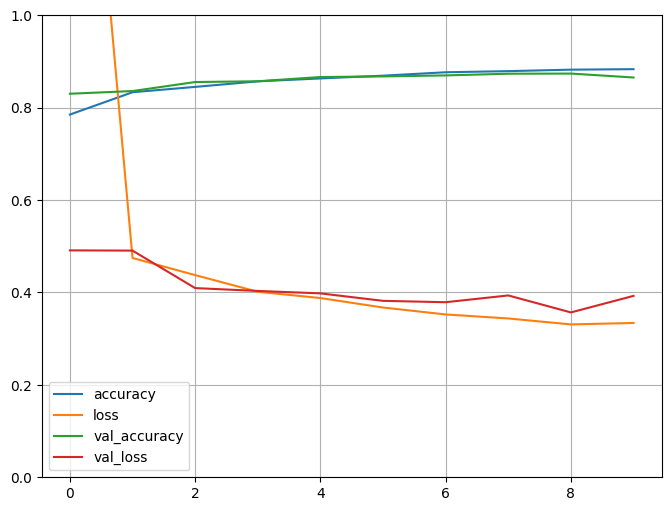

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Regression Model

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = fetch_california_housing()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [ ]:
X_train, X_val, y_train,  y_val = train_test_split(X_train, y_train)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_val, X_test = tuple(map(scaler.transform, (X_val, X_test)))

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
from tensorflow.keras import Input

In [ ]:
input = Input(shape=X_train.shape[1:])

x = layers.Dense(1024, activation='relu')(input)

skip_connection = x

x = layers.Dropout(0.25)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.25)(x)

skip_connection2 = x

x = layers.concatenate([x, skip_connection])

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.25)(x)

skip_connections3 = x

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)

x = layers.concatenate([x, skip_connection2, skip_connection, skip_connections3])
output = layers.Dense(1)(x)

model = models.Model(inputs=input, outputs=output)

In [ ]:
# model = models.Sequential([
#     layers.Dense(1024, activation='relu', input_shape=X_train.shape[1:]),
#     layers.Dropout(0.25),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.25),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(1)
# ])

In [ ]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 1024)      │      9,216 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 1024)      │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 512)       │    524,800 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 512)       │          0 │ dense_31[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 1536)      │          0 │ dropout_16[0][0], │
│ (Concatenate)       │                   │            │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 256)       │    393,472 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 256)       │          0 │ dense_32[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 128)       │     32,896 │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128)       │          0 │ dense_33[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 1920)      │          0 │ dropout_18[0][0], │
│ (Concatenate)       │                   │            │ dropout_16[0][0], │
│                     │                   │            │ dense_30[0][0],   │
│                     │                   │            │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 1)         │      1,921 │ concatenate_7[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 962,305 (3.67 MB)

 Trainable params: 962,305 (3.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.0083 - mean_absolute_error: 0.6380 - mean_squared_error: 1.0083 - val_loss: 0.3951 - val_mean_absolute_error: 0.4343 - val_mean_squared_error: 0.3951
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4019 - mean_absolute_error: 0.4503 - mean_squared_error: 0.4019 - val_loss: 0.3898 - val_mean_absolute_error: 0.4245 - val_mean_squared_error: 0.3898
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6343 - mean_absolute_error: 0.4473 - mean_squared_error: 0.6343 - val_loss: 0.4020 - val_mean_absolute_error: 0.4380 - val_mean_squared_error: 0.4020
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4116 - mean_absolute_error: 0.4239 - mean_squared_error: 0.4116 - val_loss: 0.3527 - val_mean_absolute_error: 0.4038 - val_mean_squared_error: 0.3527
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3313 - mean_absolute_error: 0.4025 - mean_squared_error: 0.3313 - val_loss: 0.3403 - val

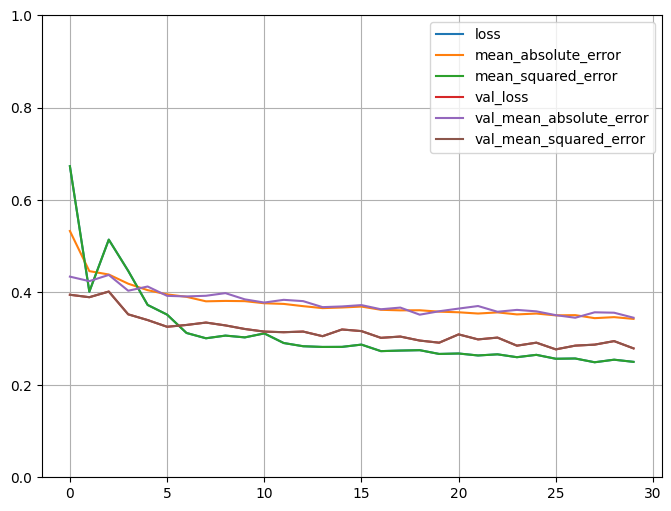

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2596 - mean_absolute_error: 0.3412 - mean_squared_error: 0.2596


[0.28303027153015137, 0.28303027153015137, 0.35203006863594055]

In [ ]:
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


array([[2.6502514],
       [2.2794175],
       [0.8937842]], dtype=float32)

In [ ]:
y_test

array([2.668, 2.397, 0.87 , ..., 1.025, 0.918, 1.942])

In [ ]:
from tensorflow.keras import layers, models, datasets, callbacks

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,111,690 (27.13 MB)

 Trainable params: 7,111,690 (27.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-5), metrics=['accuracy'])

In [ ]:
checkpoint_callback = callbacks.ModelCheckpoint('model.keras', save_best_only=True)
# model stored in HDF5 file format

early_stopping_callback = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model.fit(X_train, y_train, epochs=10, callbacks=[early_stopping_callback, checkpoint_callback], validation_data=(X_val, y_val))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1897 - loss: 18.3590 - val_accuracy: 0.6230 - val_loss: 1.0528
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4081 - loss: 3.0831 - val_accuracy: 0.7001 - val_loss: 0.8322
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5141 - loss: 1.7755 - val_accuracy: 0.7357 - val_loss: 0.7474
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5970 - loss: 1.2585 - val_accuracy: 0.7661 - val_loss: 0.6667
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6552 - loss: 1.0132 - val_accuracy: 0.7838 - val_loss: 0.6137
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6956 - loss: 0.8624 - val_accuracy: 0.7977 - val_loss: 0.5760
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7281 - loss: 0.7665 - val_accuracy: 0.8079 - val_loss: 0.5445
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7483 - loss

In [ ]:
model2 = models.load_model('model.h5')

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,913,292 (11.11 MB)

 Trainable params: 2,913,290 (11.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8371 - loss: 1.2032


[1.2095493078231812, 0.838100016117096]

In [ ]:
import numpy
numpy.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 7])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)